Deep learning with Python Francois Chollet 2018 chapter 2.1.

The goal is to train a network to classify digits using the MNIST dataset.

Original notebook: https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/2.1-a-first-look-at-a-neural-network.ipynb

Let's start by loading the training and test sets and look at their shapes. We can see that the training and test sets consists of 60000 and 10000 28x28 pixel images. Each pixel has a grayscale value between 0 and 255 stored in numpy uint8. 

In [2]:
from keras import datasets

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

print(f'The shape of the training set is: {train_images.shape}')
print(f'The shape of the test set is: {test_images.shape}')
print(f'The data type of the training set is: {train_images.dtype}')
print(f'The data type of the test set is: {test_images.dtype}')

The shape of the training set is: (60000, 28, 28)
The shape of the test set is: (10000, 28, 28)
The data type of the training set is: uint8
The data type of the test set is: uint8


Let's look at the first images from the training and test sets with their associated labels. These are grayscale images of digits with labels 5 and 7.

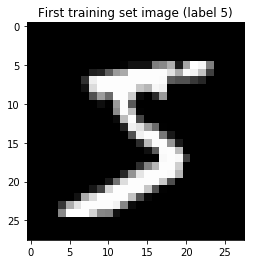

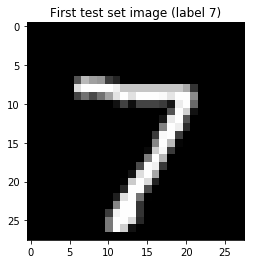

In [3]:
from matplotlib import pyplot

%matplotlib inline

def show_image(title, images, labels):
    pyplot.title(f'First {title} set image (label {labels[0]})')
    pyplot.imshow(images[0], cmap="gray")
    pyplot.show()

show_image('training', train_images, train_labels)
show_image('test', test_images, test_labels)

Next we will shape the training and test set images so that they are suitable for training the network. We convert the shape of the images from 28x28 2D tensors to 784 1D tensors and change the grayscale representation from 0-255 numpy unit8 to 0-1 numpy float32. 

In [4]:
def reshape_images(images):
    return images.reshape((images.shape[0], 28*28)).astype('float32') / 255

model_train_images = reshape_images(train_images)
model_test_images = reshape_images(test_images)

print(f'The shape of the original training set is: {train_images.shape}')
print(f'The shape of the reshaped training set is: {model_train_images.shape}')
print(f'The shape of the original test set is: {test_images.shape}')
print(f'The shape of the reshaped test set is: {model_test_images.shape}')
print(f'The data type of the original training set is: {train_images.dtype}')
print(f'The data type of the reshaped training set is: {model_train_images.dtype}')
print(f'The data type of the original test set is: {test_images.dtype}')
print(f'The data type of the reshaped test set is: {model_test_images.dtype}')

The shape of the original training set is: (60000, 28, 28)
The shape of the reshaped training set is: (60000, 784)
The shape of the original test set is: (10000, 28, 28)
The shape of the reshaped test set is: (10000, 784)
The data type of the original training set is: uint8
The data type of the reshaped training set is: float32
The data type of the original test set is: uint8
The data type of the reshaped test set is: float32


Next we shape the labels so that they are suitable for training the network. Scalar labels are replaced with 1D binary tensors with value 0 or 1 for each label. If the value is 1 then the image is associated with that label.

In [5]:
from keras.utils import to_categorical

model_train_labels = to_categorical(train_labels)
model_test_labels = to_categorical(test_labels)

print(f'The shape of the original training labels is: {train_labels.shape}')
print(f'The shape of the categorized training labels is: {model_train_labels.shape}')
print(f'The shape of the original test labels is: {test_labels.shape}')
print(f'The shape of the categorized test labels is: {model_test_labels.shape}')

The shape of the original training labels is: (60000,)
The shape of the categorized training labels is: (60000, 10)
The shape of the original test labels is: (10000,)
The shape of the categorized test labels is: (10000, 10)


Next, we define and train the network. We use a sequential network and must define the input shape for the first layer. This corresponds to the shape of the reshaped images. Once the network layers have been created we define the optimizer and loss function using the compile function. Finally, we train the network using the fit function and print out the loss and accuracy of the model.

In [7]:
import math
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
network.fit(model_train_images, model_train_labels, epochs=5, batch_size=128)

loss, accuracy = network.evaluate(model_test_images, model_test_labels)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

Epoch 1/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.2589 - acc: 0.9249
Epoch 2/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.1042 - acc: 0.9689
Epoch 3/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.0690 - acc: 0.9796
Epoch 4/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.0499 - acc: 0.9850
Epoch 5/5
10000/10000 [==============================] - 0s 42us/step
Loss: 0.07031353056817316
Accuracy: 0.9789


Let's count the number of invalid predictions in the test set. We show the number for each pair of actual and predicted labels. 

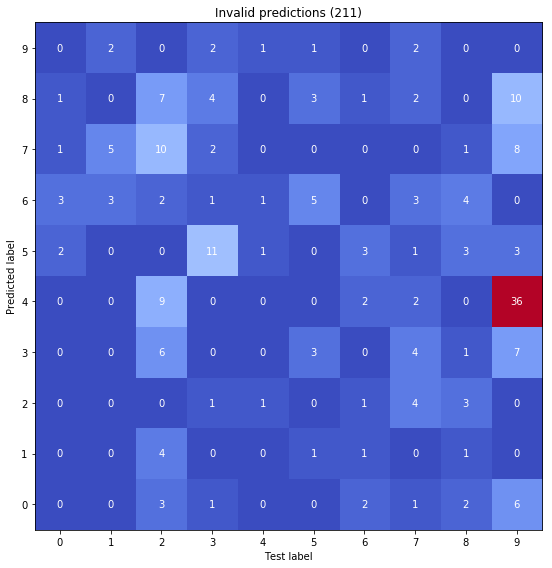

In [9]:
import numpy
from matplotlib import pyplot

predicted_labels = network.predict(model_test_images)

## Find invalid predictions.

invalid_prediction = []
invalid_prediction_cnt = numpy.zeros((10,10), dtype=int)

for i,v in enumerate(predicted_labels):
    model_test_label = numpy.where(model_test_labels[i] == numpy.amax(model_test_labels[i]))[0].item(0) # tuple + numpy array => scalar
    predicted_test_label = numpy.where(predicted_labels[i] == numpy.amax(predicted_labels[i]))[0].item(0) # tuple + numpy array => scalar
    if model_test_label != predicted_test_label:
        invalid_prediction_cnt[model_test_label][predicted_test_label] += 1        
        invalid_prediction.append((i, model_test_label, predicted_test_label))
        
total_invalid_prediction_cnt = numpy.sum(invalid_prediction_cnt)        

## Plot invalid prediction counts.

x_test_labels = numpy.arange(10)
y_predicted_labels = numpy.arange(10)

fig, ax = pyplot.subplots(figsize=(8,8))

ax.imshow(invalid_prediction_cnt, cmap="coolwarm")
ax.set_title(f'Invalid predictions ({total_invalid_prediction_cnt})')
ax.set_xticks(x_test_labels)
ax.set_yticks(y_predicted_labels)
ax.set_xlabel('Test label')
ax.set_ylabel('Predicted label')
ax.invert_yaxis()

for i in range(len(x_test_labels)):
    for j in range(len(y_predicted_labels)):
        # Show number of invalid predictions.
        text = ax.text(j, i, invalid_prediction_cnt[i, j],
                       ha="center", va="center", color="w")

fig.tight_layout()
pyplot.show()


Finally lets look at all the images in the test set which the network failed to categorize correctly. We show the correct and predicted labels for each image.

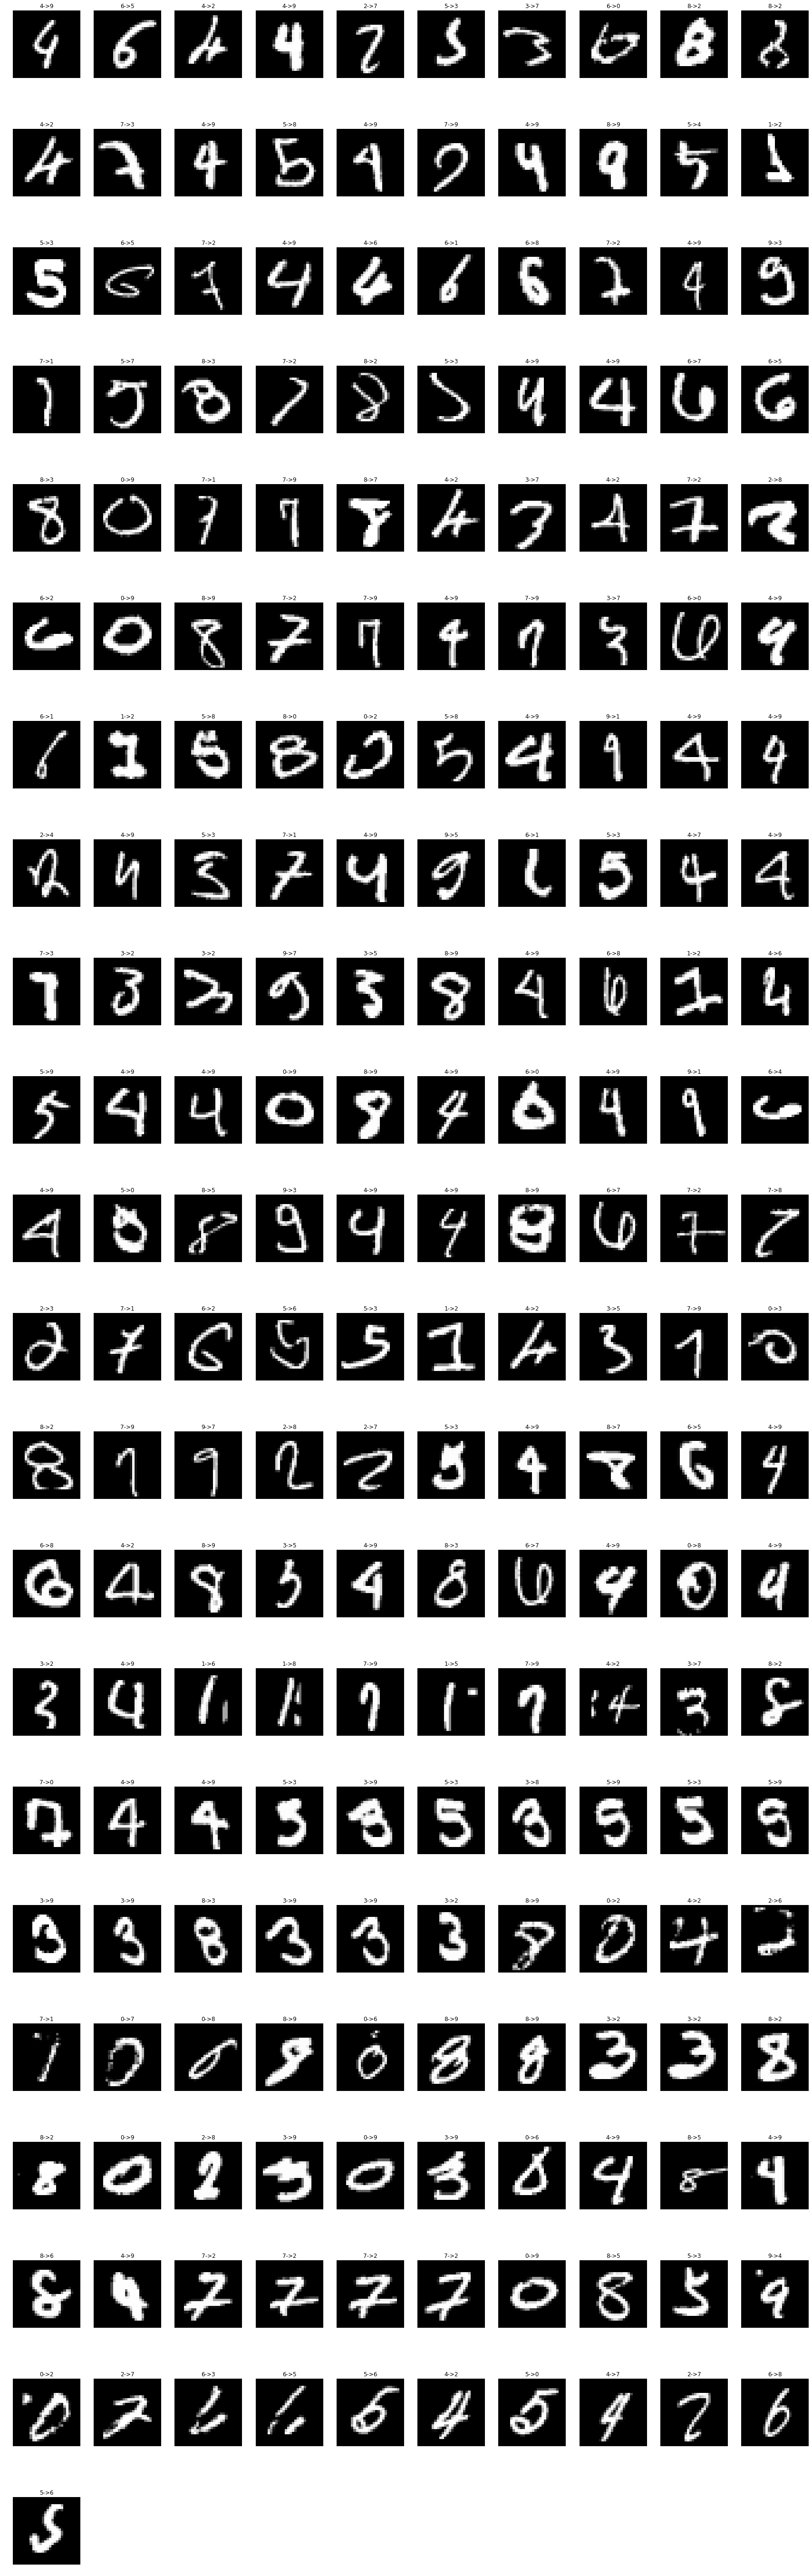

In [10]:
pyplot.rcParams["figure.figsize"] = (30,100)

ncols = 10
nrows = math.ceil(total_invalid_prediction_cnt / ncols)

for i in range(total_invalid_prediction_cnt):
    idx, model_test_label, predicted_test_label = invalid_prediction[i]
    row = math.floor(i / ncols)
    col = i % ncols
    ax = pyplot.subplot2grid((nrows,ncols),(row,col))
    ax.axis('off')
    ax.set_title(f'{model_test_label}->{predicted_test_label}')
    ax.imshow(test_images[idx], cmap="gray")
pyplot.show()
